In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss
import os

### 3 components

In [3]:
X1=np.random.normal(5,np.sqrt(0.01),100)
X2=np.random.normal(2.5,np.sqrt(0.2),50)
X3=np.random.normal(0,np.sqrt(2),25)
X=np.array(list(X1)+list(X2)+list(X3))

### 4 components

In [ ]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold1(D,4,em)
gauss.PlotGMM(D,em,10,t,[])

### Loading KIR data

In [14]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')
[B.iloc[:,0].to_numpy,B['KIR3DL1'].to_numpy()]

SyntaxError: invalid syntax (3350121218.py, line 2)

In [3]:
a=list(B)
KIR=a[1:]
KIR.remove("KIR3DL3")

In [4]:
KIR

['KIR3DP1',
 'KIR2DS5',
 'KIR2DL3',
 'KIR2DP1',
 'KIR2DS3',
 'KIR2DS2',
 'KIR2DL4',
 'KIR3DL1',
 'KIR3DS1',
 'KIR2DL2',
 'KIR3DL2',
 'KIR2DS4',
 'KIR2DL1',
 'KIR2DS1',
 'KIR2DL5']

In [5]:
def check_gaps_means(iteration_data):
    # Create list of means
    means_list=list()
    for i in range (len(iteration_data[-1])):
        means_list.append(iteration_data[-1][i]['Mean'])
    means_list.sort()
    
    # Compute the difference between means of adjacent Gaussians
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    
    def check_gaps(mean_diff):
        for i in range(len(mean_diff)):
            if mean_diff[i]>(1.5*min(mean_diff)):
                return(True,i)
        return(False,'None')
    
    return (check_gaps(means_diff))

In [18]:
def check_gaps_middle(iteration_data):
    em_last=iteration_data[-1]
    em_last=sorted(em_last, key=lambda x:x['Mean'])
    
    means_list=list()
    for i in range (len(em_last)):
        means_list.append(em_last[i]['Mean'])
    
    # Compute the difference between means of adjacent Gaussians
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    
    def check_below(mean_diff):
        smallest_mean=min(means_list)
        if smallest_mean>min(mean_diff):
            return(False)
        else:
            return(True)
    
    return(check_below(means_diff))


In [ ]:
l=[0.9989942009320248, 0.1]

In [23]:
KIR2DS3=B["KIR2DS3"].to_numpy()
em_2sd3,pxj_2ds3=gauss.EMGMM_varconstraint(KIR2DS3,4,[])
t_2ds3=gauss.findThreshold2(em_2sd3)
print(t_2ds3)
# gauss.PlotGMM(KIR2DS3,em_2sd3,50,t_2ds3,"KIR2DS3",7)
check_gaps_means(em_2sd3)
if check_gaps_means(em_2sd3)[0]==True:
    gauss_index=check_gaps_means(em_2sd3)[1]
    print(type(gauss_index))
    last_iter=em_2sd3[-1]
    extra_threshold=last_iter[gauss_index]['Mean']+(3.89*np.sqrt(last_iter[gauss_index]['Variance']))
    t_2ds3.append(extra_threshold)
print(t_2ds3)

[0.002775737143652302, 0.8421704246284241, 1.9046987445559485]


NameError: name 'check_gaps_means' is not defined

In [45]:
def check_gaps_below(iteration_data):
    # Create list of means
    em_last=iteration_data[-1]
    em_last=sorted(em_last, key=lambda x:x['Mean'])
    
    means_list=list()
    for i in range (len(em_last)):
        means_list.append(em_last[i]['Mean'])
    
    # Compute the difference between means of adjacent Gaussians
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    
    def check_below(mean_diff):
        smallest_mean=min(means_list)
        if smallest_mean>0.2 and smallest_mean>(1.5*min(mean_diff)):
            return(False,1)
        elif smallest_mean>0.2:
            return(False,0)
        else:
            return(True)
    
    return(check_below(means_diff))

(False, 1)
[0.9989942009320248, 0.1, 0.8149210304146102]


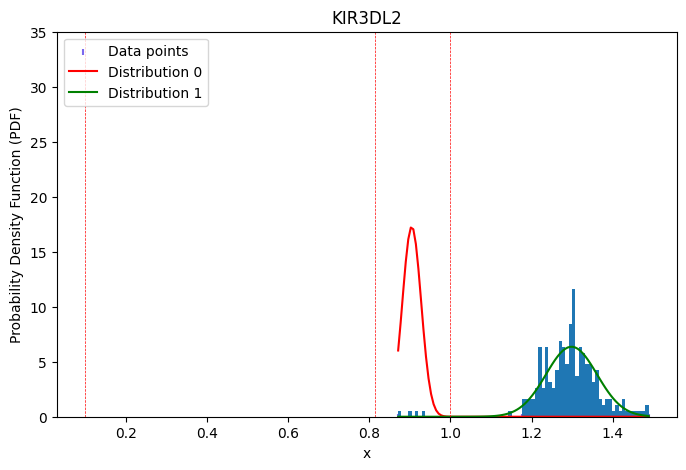

In [46]:
KIR3DL2=B['KIR3DL2'].to_numpy()
em_kir3dl2,pxj_kir3dl2=gauss.EMGMM_varconstraint(KIR3DL2,2,[])
t_kir3dl2=gauss.findThreshold2(em_kir3dl2)
if check_gaps_below(em_kir3dl2)==(False,1):
    t_kir3dl2.append(0.1)
    last_iter=em_kir3dl2[-1]
    new_thres=last_iter[0]['Mean']-(3.89*np.sqrt(last_iter[0]['Variance']))
    t_kir3dl2.append(new_thres)
gauss.PlotGMM(KIR3DL2,em_kir3dl2,10,t_kir3dl2,'KIR3DL2',35)
print(check_gaps_below(em_kir3dl2))
print(t_kir3dl2)

In [21]:
sample_n=B.iloc[:,0].to_numpy()

KIR3DP1 [0.1, 0.3394181192535229, 0.618116935397961]
KIR2DS5 [0.09518455245206578, 0.6803895784776066, 1.1068393847216755]
KIR2DL3 [0.10619147769714204, 0.8942923606439792]
KIR2DP1 [0.10906686354171681, 0.9179859366802242]
KIR2DS3 [0.0027757371436523026, 0.8421704246284244, 1.40021730536778, 1.911338805947599]
KIR2DS2 [0.02524886610364185, 0.8774895662603313]
KIR2DL4 [0.1, 0.5995979092680053, 1.0636978660198526]
KIR3DL1 [0.02649180055239727, 0.866671490648511]
KIR3DS1 [0.2563678737343204, 0.9344950467555713, 1.590347514871909]
KIR2DL2 [0.016688561088248805, 0.6455347959555763]
KIR3DL2 [0.1, 0.8149210304146103, 0.998994200932026]
KIR2DS4 [0.008760822422648265, 0.8266234251177158]
KIR2DL1 [0.09644867596897053, 0.769325692657364]
KIR2DS1 [0.05334386995725986, 0.347434929242454]
KIR2DL5 [0.07668837446967652, 0.6288460626522756, 0.9079788202284771]


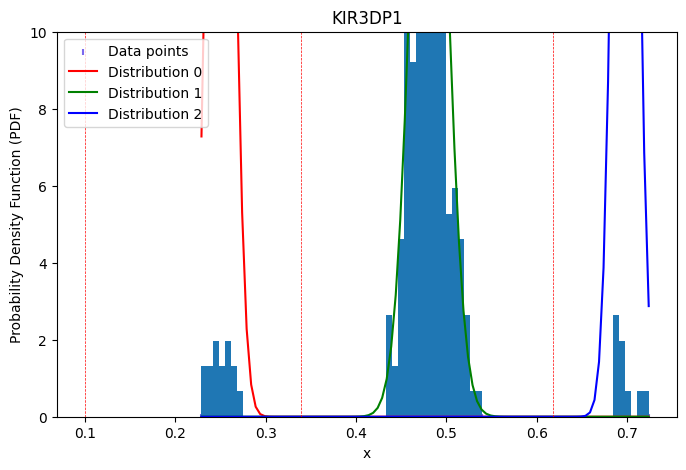

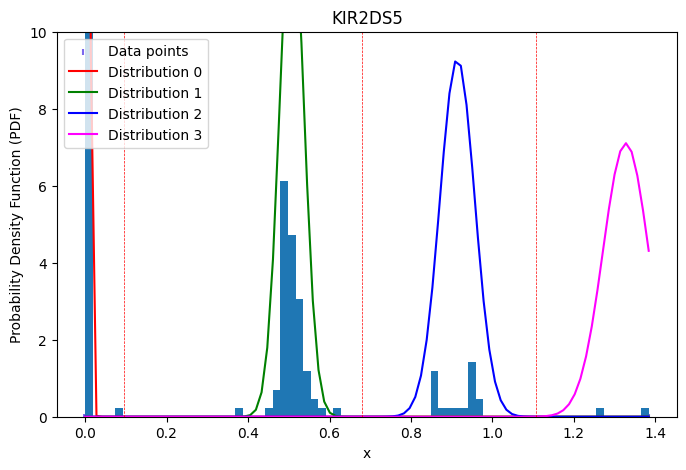

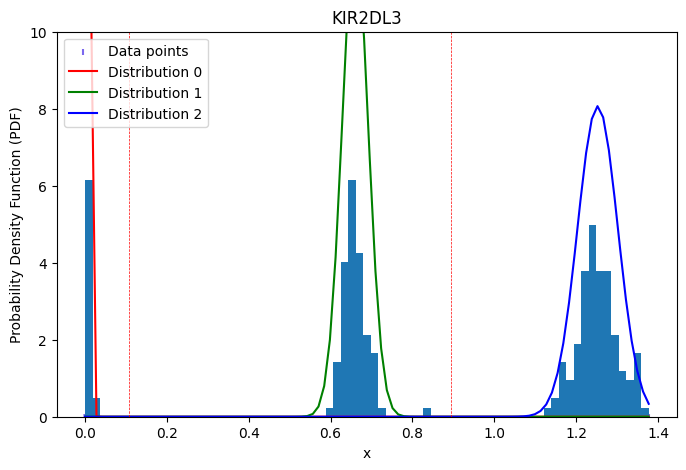

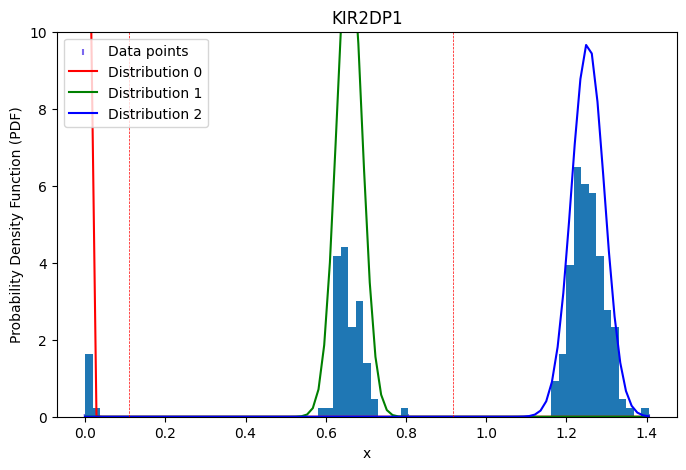

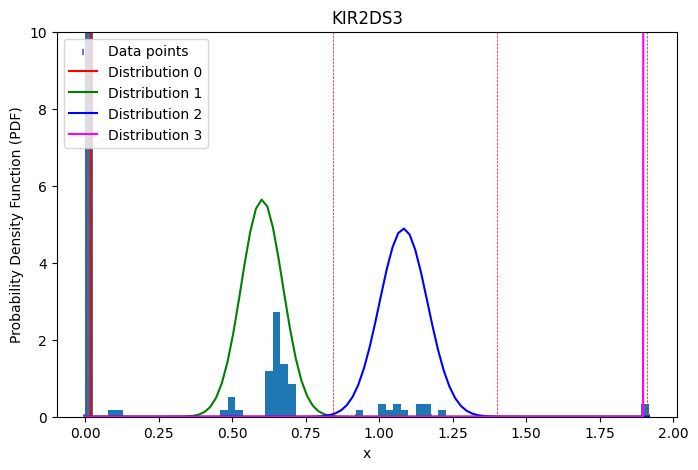

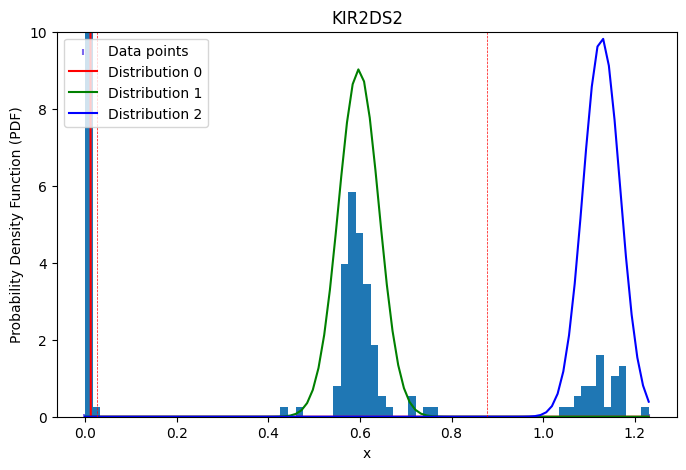

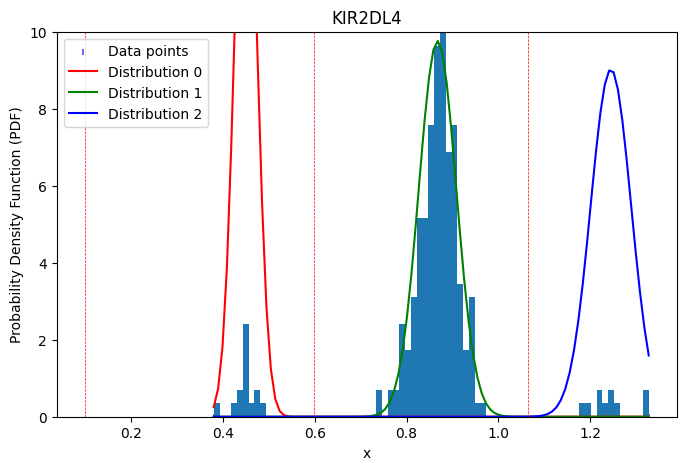

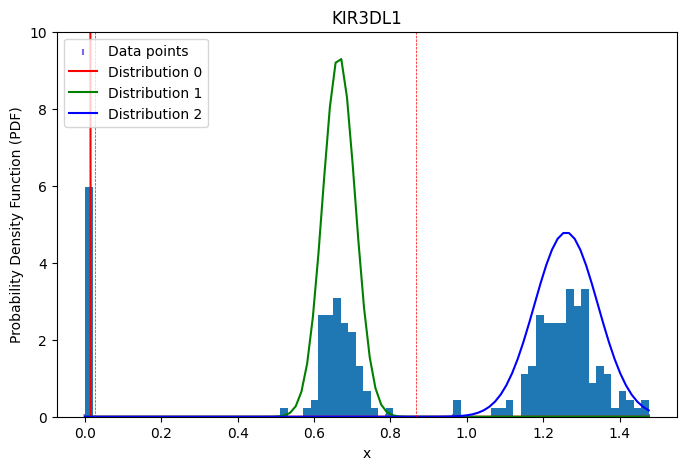

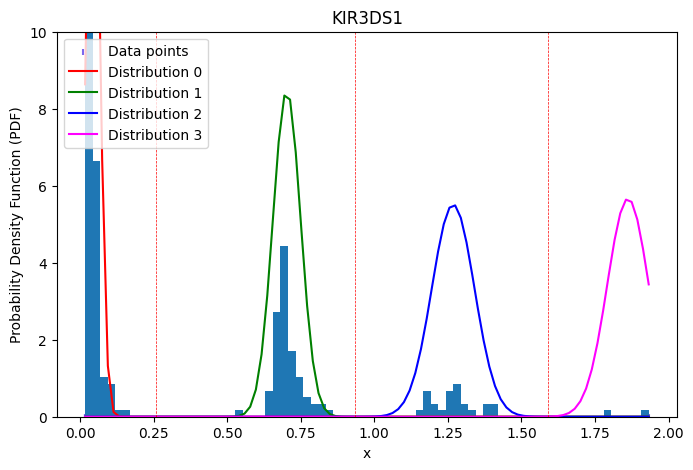

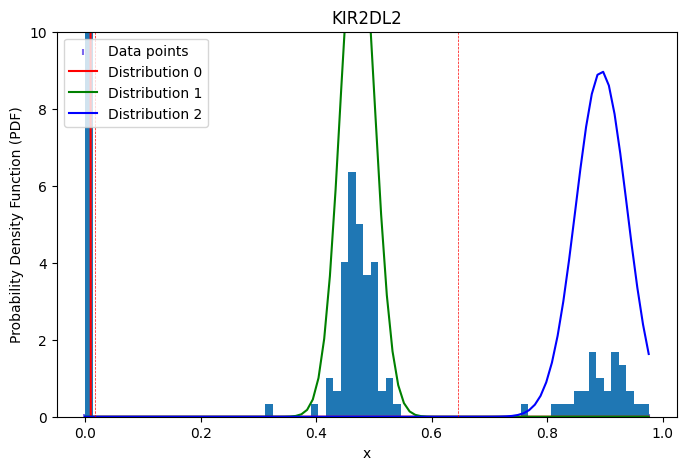

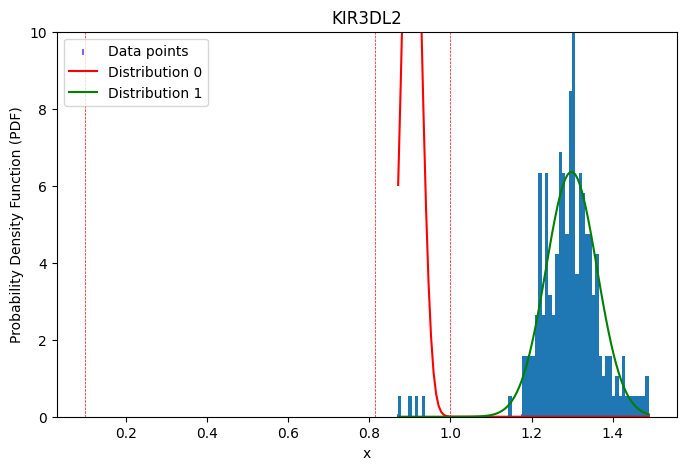

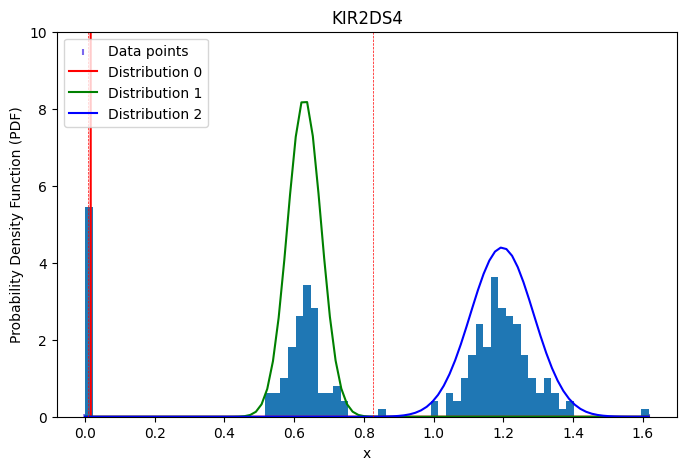

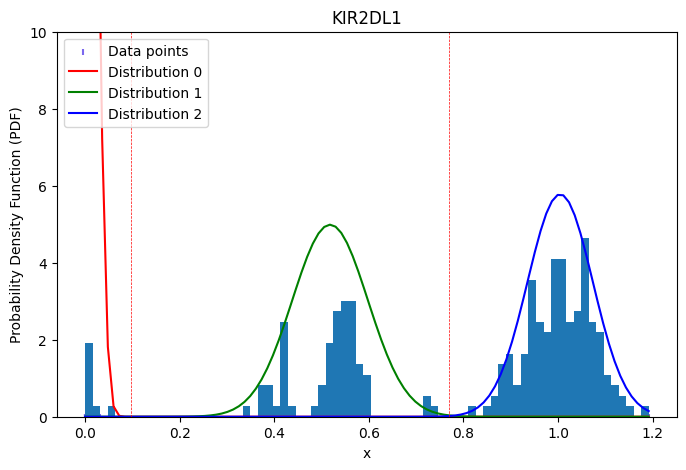

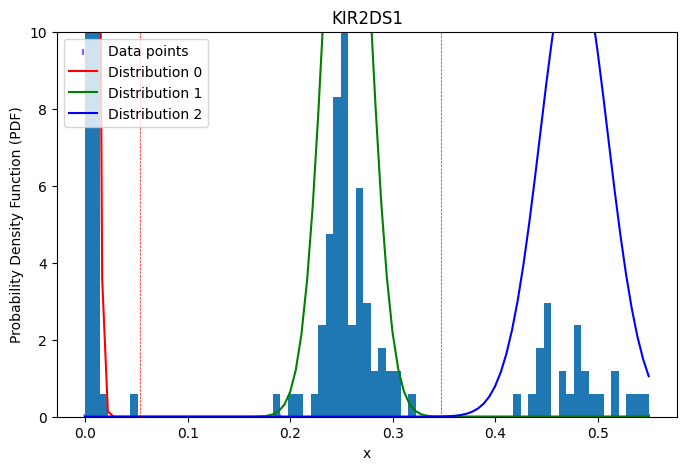

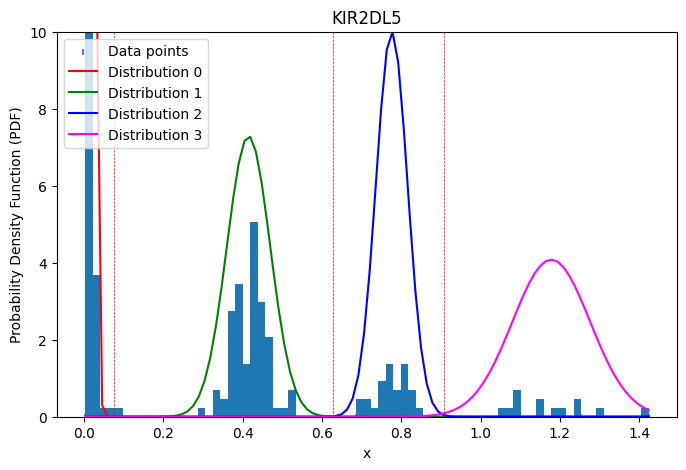

In [29]:
import csv

threshold_all=list()
data_lowprob_all=list()
for i in KIR:
    X=B["{}".format(i)].to_numpy()
    
    def main(X):

        n_components=gauss.BIC_gmm(X)
        low_prob_proportion=len(X)
        while n_components<6:
            em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
            low_prob_proportion,data_lowprob=gauss.check_prob2(pxj,em)
            if low_prob_proportion>=(0.03*len(X)):
                n_components=n_components+1
            elif gauss.check_mean_dis(em)==False:
                n_components=n_components-1
            else:
                break
        return(em,pxj)
    
    em,pxj=main(X)
    
    # Thresholds
    thresholds=gauss.findThreshold2(em)

    
    # Check threshold of 0 copies
    if gauss.check_gaps_below(em)==(False,0):
        thresholds.append(0.1)
    elif gauss.check_gaps_below(em)==(False,1):
        thresholds.append(0.1)
        last_iter=em[-1]
        new_thres=last_iter[0]['Mean']-(3.89*np.sqrt(last_iter[0]['Variance']))
        thresholds.append(new_thres)   

    # Check if there is "double gap", add threshold if yes.
    if gauss.check_gaps_means(em)[0]==True:
        gauss_index=gauss.check_gaps_means(em)[1]
        last_iter=em[-1]
        extra_threshold_1=last_iter[gauss_index]['Mean']+(3.89*np.sqrt(last_iter[gauss_index]['Variance']))
        dis_thres=extra_threshold_1-thresholds[-1]
        extra_threshold_2=last_iter[gauss_index+1]['Mean']-(3.89*np.sqrt(last_iter[gauss_index+1]['Variance']))
        thresholds=thresholds[:-1]
        thresholds.append(extra_threshold_1)
        thresholds.append(extra_threshold_2)
    thresholds.sort()
    
    print(i,thresholds)

    threshold_all.append(thresholds)

    # Sample numbers with low probability
    prop_lowprob,data_lowprob=gauss.check_prob2(pxj,em)
    lowprob_sample_number=list()
    for k in data_lowprob:
        lowprob_sample_number.append(sample_n[k])
        
    data_lowprob_all.append(lowprob_sample_number)
    
    #Output the figures
    fig=gauss.PlotGMM(X,em,50,thresholds,i,10)
    output_path= "/Users/devitahalim/Documents/GitHub/scie30001-project/output/plots/plot_"
    fig.savefig(output_path+(i))

### Create CSV for thresholds

In [30]:
for i in range (len(KIR)):
    threshold_all[i].insert(0,KIR[i])

# CSV for thresholds
threshold_header=["","0-1","1-2","2-3","3-4","4-5","5-6"]
threshold_data=threshold_all
with open('/Users/devitahalim/Documents/GitHub/scie30001-project/output/output_threshold.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(threshold_header)
    # Use writerows() not writerow()
    writer.writerows(threshold_data)
    

### Create CSV for low likelihood data

In [31]:

# CSV for low probability
lowprob_header=["","Sample number with low likelihood"]
lowprob_data=list()
for i in range(len(KIR)):
    k=KIR[i],data_lowprob_all[i]
    lowprob_data.append(k)

with open('/Users/devitahalim/Documents/GitHub/scie30001-project/output/output_outliers.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(lowprob_header)
    # Use writerows() not writerow()
    writer.writerows(lowprob_data)

### KIR Examples one by one

In [41]:
# KIR with 4 number of components
KIR2DS3_data=B["KIR2DS3"].to_numpy()

KIR2DS3_data.sort()

[{'Mean': 0.0039514586396841266,
  'Variance': 2.6229314672480448e-05,
  'Weight': 0.5521739126772349},
 {'Mean': 0.2554993016965426,
  'Variance': 0.00045840937729610637,
  'Weight': 0.3347819763869724},
 {'Mean': 0.4767652279677343,
  'Variance': 0.0010858231181056805,
  'Weight': 0.11304411093579278}]

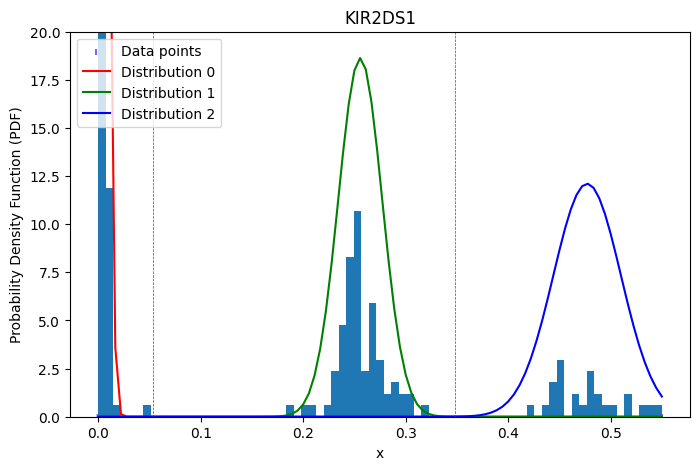

In [53]:
KIR2DS1=B["KIR2DS1"].to_numpy()
KIR2DS1.sort()

def main2(X):

    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob_proportion=len(X)
    while n_components<6:
        em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
        low_prob_proportion=gauss.check_prob2(pxj,em)
        if low_prob_proportion>=(0.05*len(X)):
            n_components=n_components+1
        elif gauss.check_mean_dis(em)==False:
            n_components=n_components-1
        else:
            break
    return(em)

n_components=gauss.BIC_gmm(KIR2DS1)
em_KIR2DS1,pxj_KIR2DS1=gauss.EMGMM_varconstraint(KIR2DS1,3,[])
t_KIR2DS1=gauss.findThreshold2(em_KIR2DS1)
gauss.PlotGMM(KIR2DS1,em_KIR2DS1,10,t_KIR2DS1,"KIR2DS1",20)

gauss.check_mean_dis(em_KIR2DS1)
em_KIR2DS1[-1]

### Use sklearn.mixture.GaussianMixture

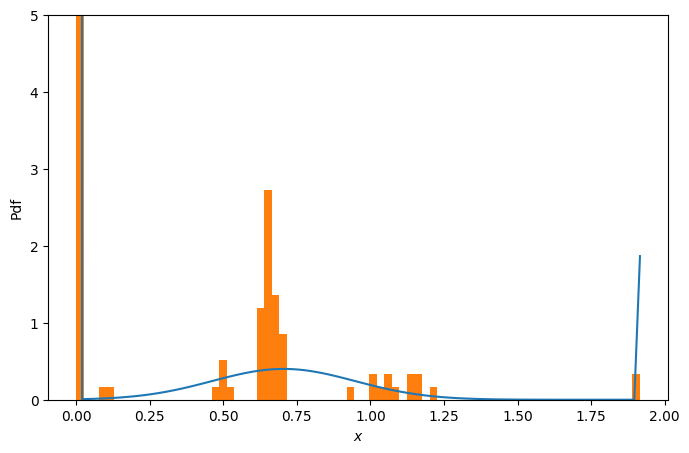

In [4]:
X=KIR2DS3_data
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N=np.arange(1, 5)
models=[None for i in range(len(N))]

for i in range(len(N)):
    models[i]=GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC=[m.aic(X) for m in models]
BIC=[m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
# M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
# log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
# resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
# pdf2=np.exp(log_prob2)


# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.ylim(0,5)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()


### Number of components adjustment (lots of data having low likelihood)

In [5]:
def check_prob2(pxj,iteration_data):
    
    last_iter=iteration_data[-1]
    # Rearrange array into individual likelihoof of each data points
    prob_indv= [None for i in range(len(pxj[0]))]
    for i in range(len(pxj[0])):
        prob_indv[i]=[pxj[j][i] for j in range (len(pxj))]

    # Calculate the minimum likelihood for each gaussian (99.7%)
    min_likelihood=list()
    for j in range(len(last_iter)):
        indv_likelihood=gauss.GaussianPDF((last_iter[j]['Mean']+(2.967738*np.sqrt(last_iter[j]['Variance']))),last_iter[j]['Mean'],last_iter[j]['Variance'])
        min_likelihood.append(indv_likelihood)
    
    # Create list of elements that have high likelihood of belonging to any gaussian
    highprob=list()
    for i in range (len(pxj[0])):
        indv_high_prob=[l1 for l1,l2 in zip(prob_indv[i],min_likelihood) if l1>l2]
        highprob.append(indv_high_prob)
    
    print(min_likelihood)
    # Identify the one with no adequate likelihood of belonging to any gaussian
    n_lowprob=list()
    for i in range(len(highprob)):
        if highprob[i]==[]:
            n_lowprob.append(i)

    return (len(n_lowprob))

In [45]:
em_KIR2DS3,pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),[])

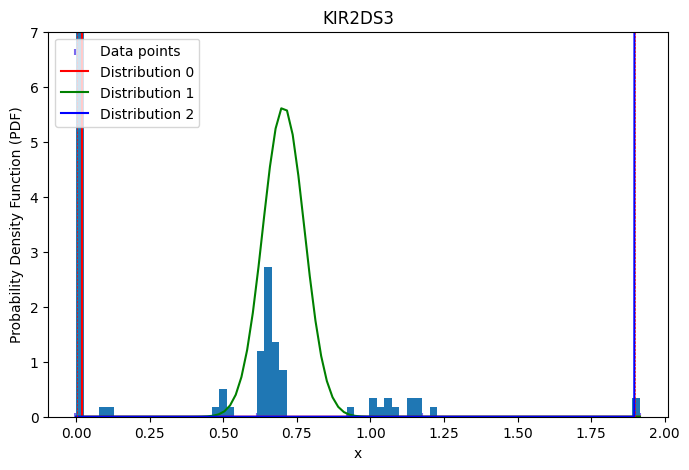

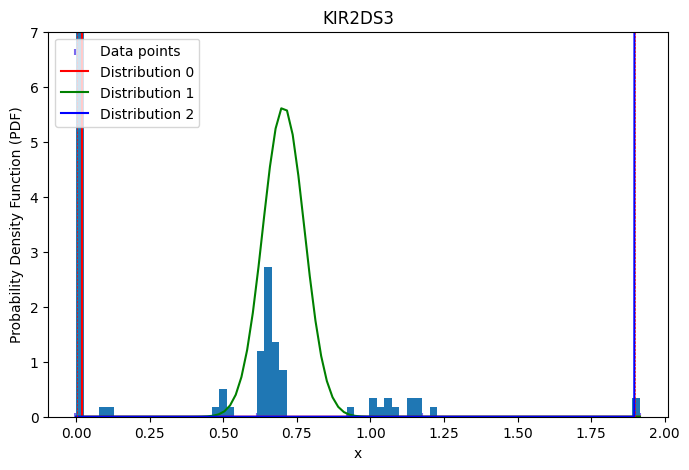

In [46]:
# Plot
t_KIR2DS3=gauss.findThreshold2(em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,em_KIR2DS3,10,t_KIR2DS3,'KIR2DS3',7)

In [47]:
KIR2DL3_data=B["KIR2DL3"].to_numpy()
KIR2DL3_data.sort()

In [48]:
em_KIR2DL3,pxj_2DL3=gauss.EMGMM_varconstraint(KIR2DL3_data,gauss.BIC_gmm(KIR2DL3_data),[])

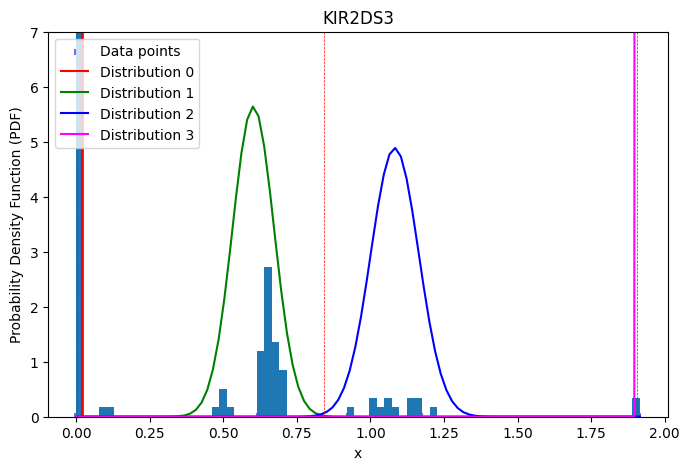

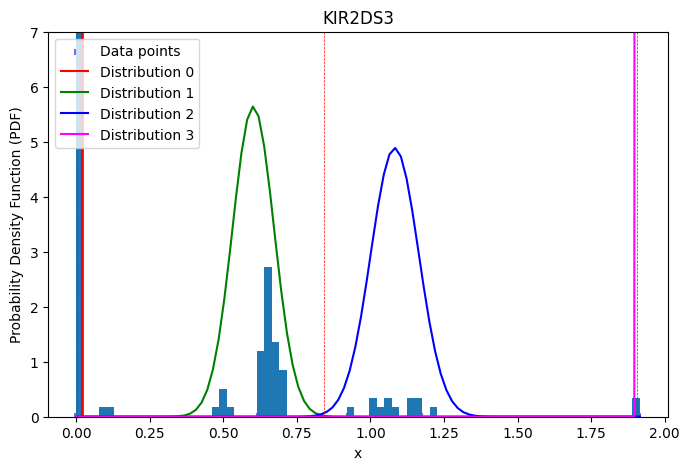

In [55]:
new_em_KIR2DS3,new_pxj_KIR2DS3=main(KIR2DS3_data)
t_KIR2DS3=gauss.findThreshold2(new_em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,new_em_KIR2DS3,10,t_KIR2DS3,'KIR2DS3',7)

In [56]:
new_em_KIR2DS3[-1]

[{'Mean': 0.00023312018670542818,
  'Variance': 7.559652896725402e-08,
  'Weight': 0.7478260869416665},
 {'Mean': 0.6016392632955548,
  'Variance': 0.005002483361536954,
  'Weight': 0.19130929970385188},
 {'Mean': 1.0826693834913932,
  'Variance': 0.006663759999472089,
  'Weight': 0.05216896118056859},
 {'Mean': 1.91535409239478,
  'Variance': 1.0654519368042196e-06,
  'Weight': 0.008695652173913044}]

In [119]:
check_gaps_means(new_em_KIR2DS3)

True

In [124]:
new_em_KIR2DL3,new_pxj_KIR2DL3=main(KIR2DL3_data)
check_gaps_means(new_em_KIR2DL3)
# t_KIR2DL3=gauss.findThreshold2(new_em_KIR2DL3)
# gauss.PlotGMM(KIR2DL3_data,new_em_KIR2DL3,10,t_KIR2DL3,'KIR2DL3',7)

False

### Number of components adjustments (mean to close together)

In [15]:
em_KIR2DS3[-1]

[{'Mean': 0.00023312018674629138,
  'Variance': 7.55965290784572e-08,
  'Weight': 0.7478260869567422},
 {'Mean': 0.7047073630372533,
  'Variance': 0.005,
  'Weight': 0.24347826086934482},
 {'Mean': 1.91535409239478,
  'Variance': 1.0654519368042196e-06,
  'Weight': 0.008695652173913044}]

In [14]:
# Calculate the distance between the means
def check_mean_dis(iteration_data):
    means_list=list()
    for i in range (len(iteration_data[-1])):
        means_list.append(iteration_data[-1][i]['Mean'])
    
    means_list.sort()
    print("Means: ", means_list)
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    print("Distance between means :",means_diff)

    def all_meansdiff(means_diff):
        for i in means_diff:
            if i <0.4:
                return False
        return True
    return (all_meansdiff(means_diff))

# # Reduce number of components if the distance is less than 0.4
# if all_meansdiff(means_diff)==False:
#     index=index-1

### Test weird case where n_components=5

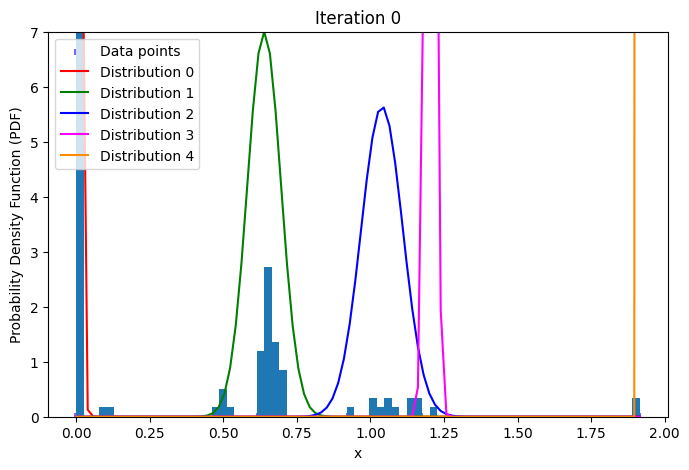

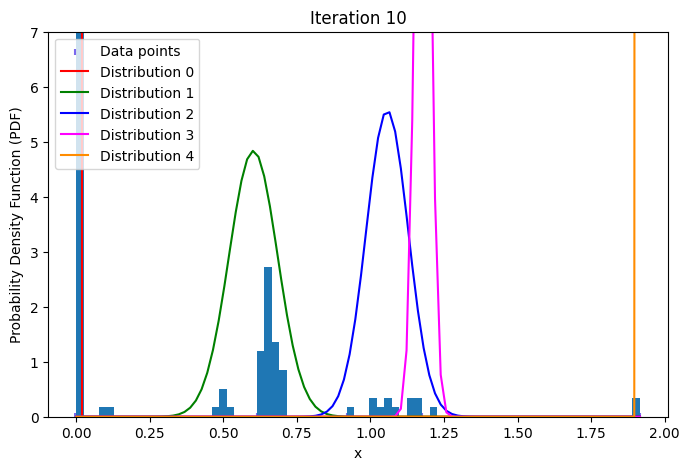

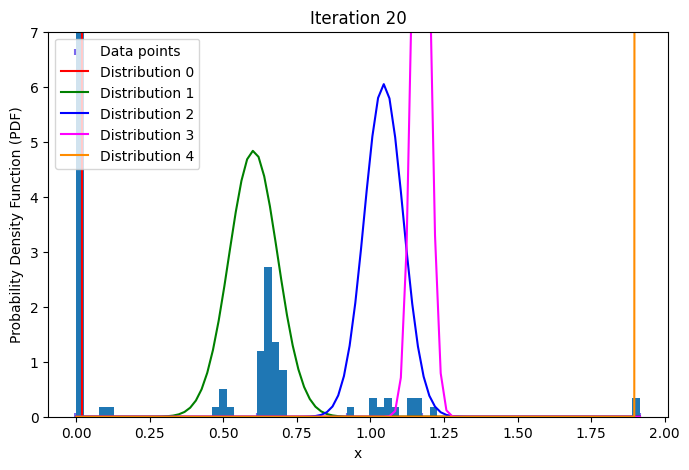

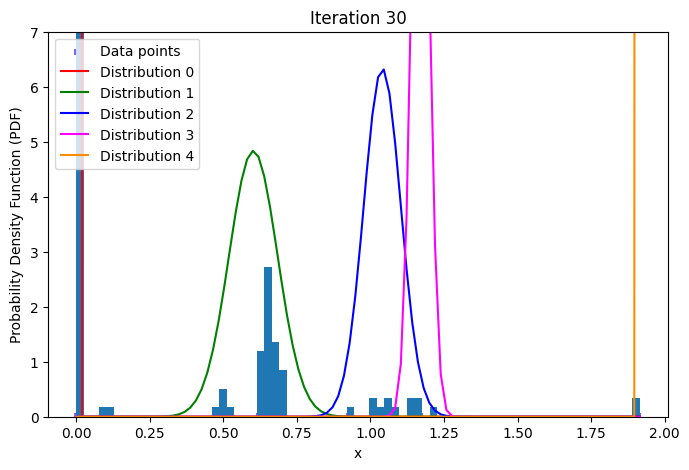

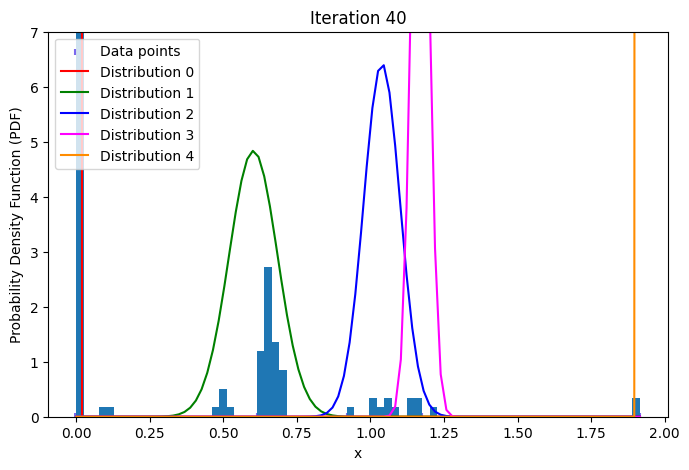

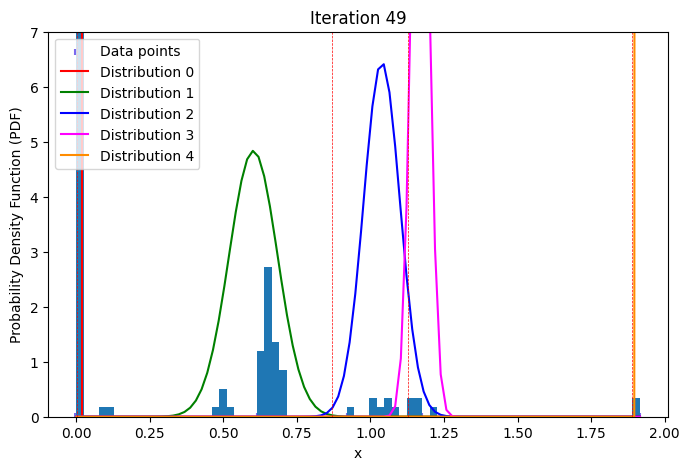

In [15]:
weird_em_2DS3,weird_pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,5,[])
weird_t=gauss.findThreshold2(weird_em_2DS3)
gauss.PlotGMM(KIR2DS3_data,weird_em_2DS3,10,weird_t,7)